# Ordinary least squares in Python

This is an example of a linear regression implemented in Python programming language.

The following example uses the regression model impelemted in `sklearn` module: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model

Data from an example explained in detail on Wikipedia, see:
    https://en.wikipedia.org/wiki/Linear_least_squares_(mathematics)#Example.

In [2]:
X = np.array([[1,2,3,4]]).T
y = np.array([[6,5,7,10]]).T

In [3]:
X

array([[1],
       [2],
       [3],
       [4]])

In [4]:
y

array([[ 6],
       [ 5],
       [ 7],
       [10]])

In [5]:
# Create linear regression object
regression_model = linear_model.LinearRegression()

regression_model

LinearRegression()

Show the attributes of the object.

In [6]:
regression_model.__dict__

{'fit_intercept': True, 'normalize': False, 'copy_X': True, 'n_jobs': None}

Fit the model to the predefined data.

In [7]:
regression_model.fit(X, y)

LinearRegression()

First, show all the attributes, we will explain these in detail later on.

In [8]:
regression_model.__dict__

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'n_features_in_': 1,
 'coef_': array([[1.4]]),
 '_residues': array([4.2]),
 'rank_': 1,
 'singular_': array([2.23606798]),
 'intercept_': array([3.5])}

The coefficient is the slope of the regression line.

In [9]:
print('Coefficients: %s' % regression_model.coef_)

Coefficients: [[1.4]]


The intercept is the value at which the regression line crosses the ordinate.

In [10]:
print('Intercept: %s' % regression_model.intercept_)

Intercept: [3.5]


Residual sum of squares represents the mean square error.

In [11]:
print("Residual sum of squares: %.2f"
      % np.mean((regression_model.predict(X) - y) ** 2))

Residual sum of squares: 1.05


How much variance is explained by the regression? A score of `1.0` is a perfect prediction.

From the documentation:

 > `score(X, y[, sample_weight]) | Return the coefficient of determination of the prediction.`

In [12]:
determination_coef = regression_model.score(X, y)

print('Variance explained: %s (%s%%)' % (determination_coef,
                                    determination_coef*100))

Variance explained: 0.7 (70.0%)


A visualization will help us to understand how the regression works.

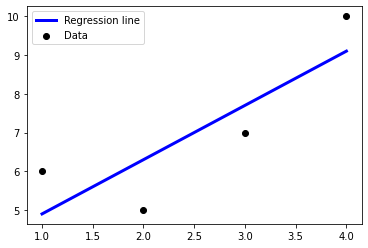

In [13]:
plt.scatter(X, y,
            color='black',
            label='Data')

plt.plot(X, regression_model.predict(X),
         color='blue', linewidth=3, label='Regression line')

plt.legend()
plt.show()

Having the regression parameters defined (by fitting the regression line with the least squares approach), we can answer the following question:

__What are the predicted values for the arguments from our example data?__

In [14]:
y_true = y
y_predicted = regression_model.predict(X)

In [15]:
y_true

array([[ 6],
       [ 5],
       [ 7],
       [10]])

In [16]:
y_predicted

array([[4.9],
       [6.3],
       [7.7],
       [9.1]])

Let's see true and predicted values:

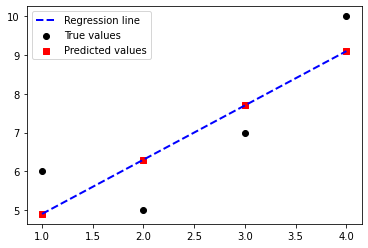

In [17]:
# True values
plt.scatter(X, y,
            color='black',
            label='True values')

# Values predicted with the regression
plt.scatter(X, y_predicted,
            color='red',
            marker='s',
            label='Predicted values')

# The regression line
plt.plot(X, regression_model.predict(X),
         color='blue', linewidth=2, linestyle='--',
         label='Regression line')

plt.legend()
plt.show()

From `sklearn`'s `LinearRegression()` documentation:

The coefficient `R^2` (_R-squared_) is defined as `(1 - u/v)`

where:
 * `u` is the regression sum of squares `((y_true - y_pred) ** 2).sum()`
 * `v` is the residual sum of squares `((y_true - y_true.mean()) ** 2).sum()`

In [18]:
R_squared = 1 - (
    ((y_true - y_predicted) ** 2).sum()/((y_true - y_true.mean()) ** 2).sum()
    )

print('R squared: %s' % R_squared)

R squared: 0.7
